# Natural Language Processing with Disaster Tweets

The idea is to implement the TF-IDF vectorizer and Ridge classifier in order to classificate the text in every tweet.

# Step 1. Import Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [2]:
trainPath = '../input/nlp-getting-started/train.csv'
testPath = '../input/nlp-getting-started/test.csv'

train_df = pd.read_csv(trainPath)
test_df  = pd.read_csv(testPath)

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7613.0,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
target,7613.0,0.429660,0.49506,0.0,0.0,0.0,1.0,1.0


## Exploratory Data Analysis

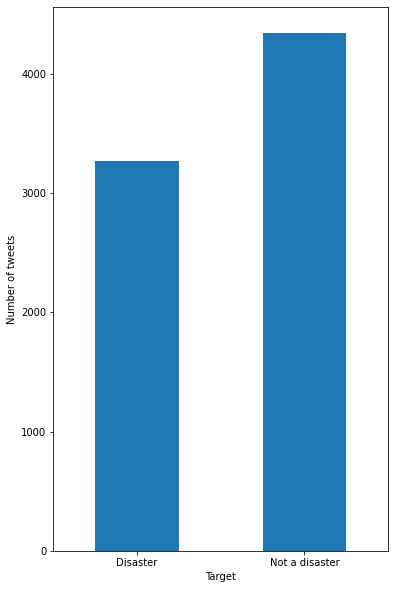

In [5]:
fig, ax = plt.subplots(figsize=(6,10))
train_df['target'].value_counts(sort=False).plot(kind='bar')
x = ['Disaster', 'Not a disaster']
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x, rotation=0)
plt.xlabel('Target')
plt.ylabel('Number of tweets')
plt.show()

In [6]:
import plotly.express as px

fig = px.pie(train_df, names='target', height=600, width= 600, title='Pie Chart for distribution of Tweets')
fig.update_traces(textfont_size=15)
fig.show()

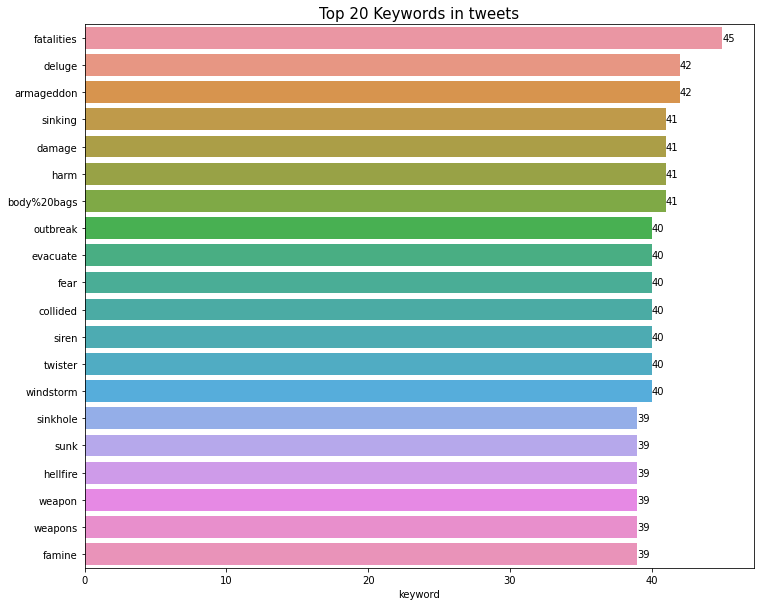

In [7]:
# keywords

fig,axes = plt.subplots(figsize=(12,10))

top_keywords=train_df['keyword'].value_counts()[:20]
ax = sns.barplot(y=top_keywords.index, x=top_keywords,data=train_df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 20 Keywords in tweets',fontsize=15)
plt.show()

Text(0, 0.5, 'Thickness')

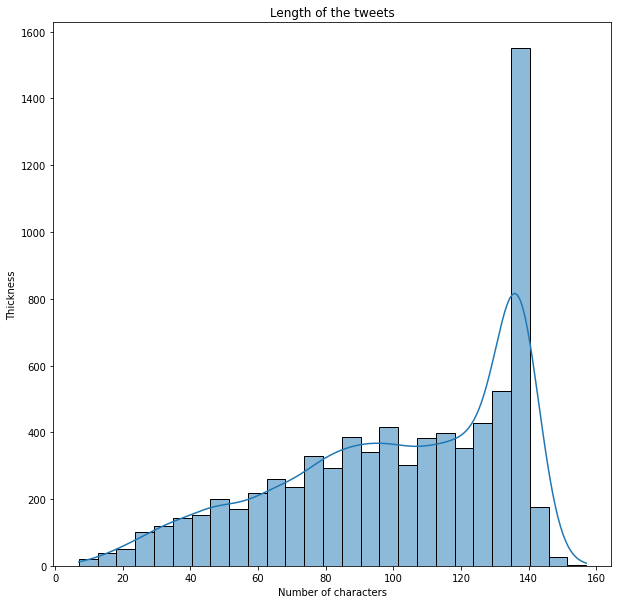

In [8]:
# Length of the tweets
train_df['length'] = train_df['text'].apply(len)

plt.figure(figsize=(10, 10))
sns.histplot(train_df['length'], kde=True)
plt.title('Length of the tweets')
plt.xlabel('Number of characters')
plt.ylabel('Thickness')

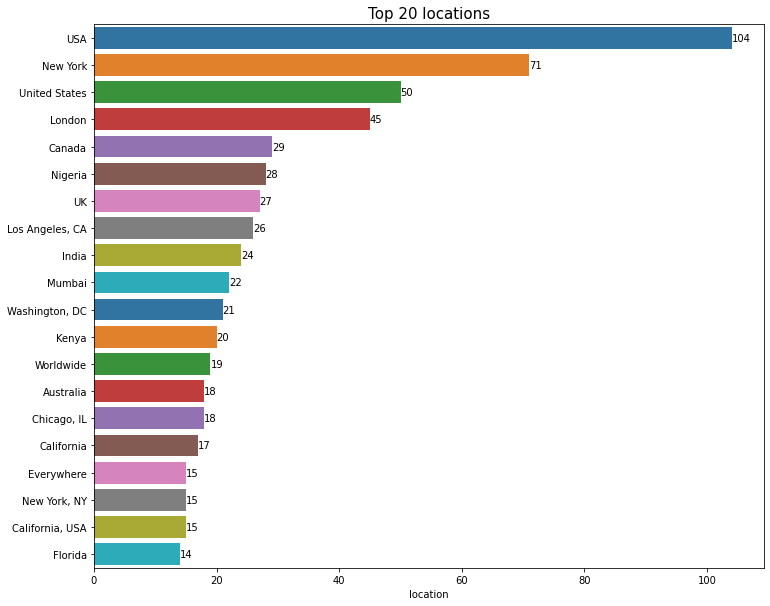

In [9]:
fig,axes = plt.subplots(figsize=(12,10))

top_location=train_df['location'].value_counts()[:20]
ax = sns.barplot(y=top_location.index, x=top_location, palette='tab10',data=train_df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 20 locations',fontsize=15)
plt.show()

# Step 2. Using TF-IDF Vectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = feature_extraction.text.TfidfVectorizer()

train_vectors = vectorizer.fit_transform(train_df["text"])
test_vectors = vectorizer.transform(test_df["text"])

Let's see how is the score, using the fact that the metric for this competition is F1.

# Step 3. The Model and Score

In [11]:
clf = linear_model.RidgeClassifier()

scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.63366337, 0.6122449 , 0.68442211])

The score is around 0.65, which is not bad. Let's fit the data.

In [12]:
clf.fit(train_vectors, train_df["target"])

RidgeClassifier()

# Submission

In [13]:
sample_submission = pd.read_csv("../input/nlp-getting-started/sample_submission.csv")

In [14]:
sample_submission["target"] = clf.predict(test_vectors)

In [15]:
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1


In [16]:
sample_submission.to_csv("submission.csv", index=False)